<a href="https://colab.research.google.com/github/Luke-Coffman/IS-4487/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [19]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import ast


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [2]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/x_superbowl.csv')

print (df)

Mounted at /content/gdrive
      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [21]:

df['retweeted_status'] = ~df['retweeted_status'].isna()
df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='coerce').fillna(0).astype(int)

df['user'] = df['user'].apply(ast.literal_eval)
users_df = pd.json_normalize(df['user'])





ValueError: malformed node or string: {'id': 1203783723633692677, 'id_str': '1203783723633692677', 'name': '?????FUCK??????', 'screen_name': 'ycgTuye1ma4zyxn', 'location': None, 'url': None, 'description': '???????????? FUCK?????? ????????RT?????????? ??????dm???????? ???????????????????????', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 37, 'friends_count': 97, 'listed_count': 1, 'favourites_count': 393, 'statuses_count': 847, 'created_at': 'Sun Dec 08 21:10:34 +0000 2019', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': '', 'profile_background_image_url_https': '', 'profile_background_tile': False, 'profile_link_color': '1DA1F2', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1358429067704299524/sb7IgWpY_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1358429067704299524/sb7IgWpY_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1203783723633692677/1612709840', 'default_profile': True, 'default_profile_image': False, 'following': None, 'follow_request_sent': None, 'notifications': None}

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

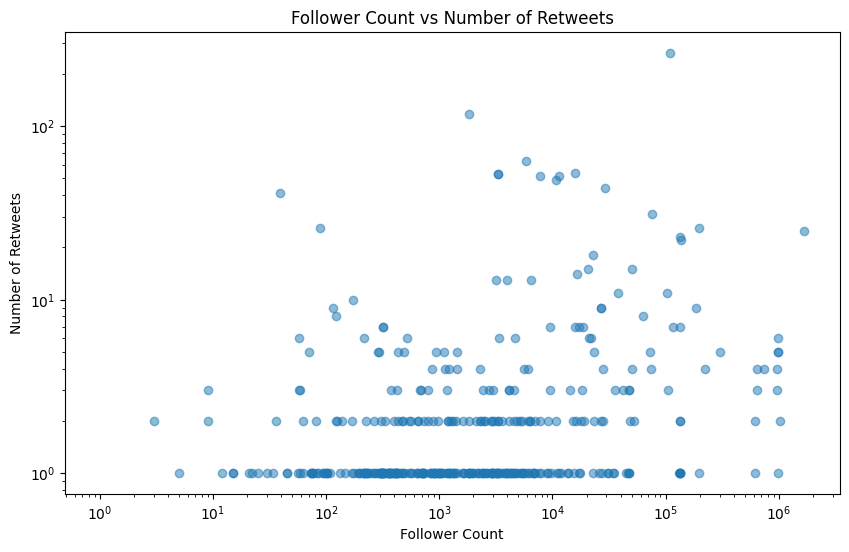

In [38]:
#chart 1
import matplotlib.pyplot as plt
df['follower_count'] = df['user'].apply(lambda x: x.get('followers_count', 0))

plt.figure(figsize=(10, 6))
plt.scatter(df['follower_count'], df['retweet_count'], alpha=0.5)
plt.title('Follower Count vs Number of Retweets')
plt.xlabel('Follower Count')
plt.ylabel('Number of Retweets')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.yscale('log')
plt.show()

<ipython-input-46-9d14560ef4cc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='user_follower_count', y='user_screen_name', data=top_users, palette='viridis')


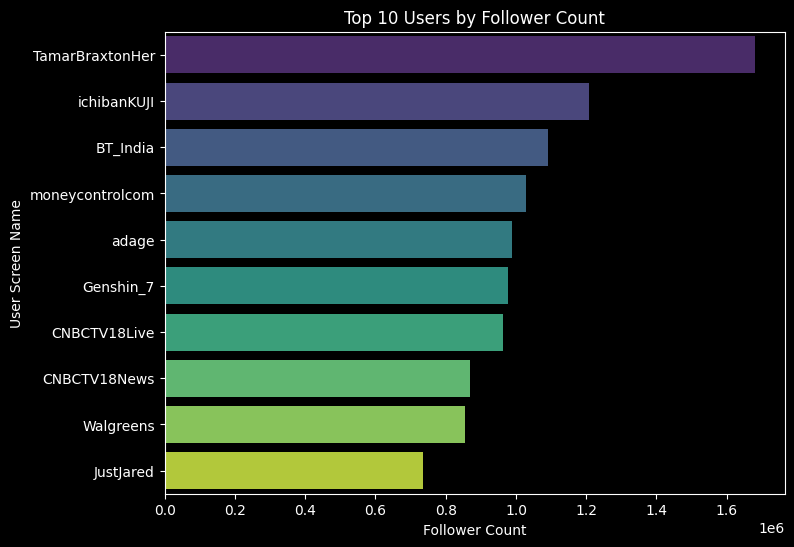

In [46]:
#chart 2
import matplotlib.pyplot as plt
import seaborn as sns



df['user_screen_name'] = df['user'].apply(lambda x: x.get('screen_name', ''))
df['user_follower_count'] = df['user'].apply(lambda x: x.get('followers_count', 0))

top_users = df[['user_screen_name', 'user_follower_count']].drop_duplicates().nlargest(10, 'user_follower_count')

plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='user_follower_count', y='user_screen_name', data=top_users, palette='viridis')
plt.title('Top 10 Users by Follower Count')
plt.xlabel('Follower Count', color='white')
plt.ylabel('User Screen Name', color='white')
plt.show()

